In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# 한글 폰트 설정을 위한 코드 (이미 설정하셨다면 생략)
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

In [2]:
df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_4차_전처리.csv')
df.head()

,아이디,국가별,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,...,총_기타_지출경비,총_뷰티/의료_지출경비,총_국내_지출경비,여행_가이드_비율,숙박_비율,교통_비율,체험_문화_비율,쇼핑_비율,기타_비율,뷰티/의료_비율
0,57,13,2,5,4,6,1.0,3,3,3.0,...,0.000000,0.0,2310.000000,0.004,0.433,0.065,0.022,0.216,0.000,0.0
1,58,3,2,4,4,6,9.0,6,2,2.0,...,8.098481,0.0,846.372229,0.000,0.239,0.029,0.005,0.574,0.010,0.0
2,59,3,2,3,3,6,10.0,2,2,3.0,...,8.073777,0.0,742.948932,0.000,0.217,0.054,0.043,0.435,0.011,0.0
3,60,1,1,2,1,7,9.0,2,2,3.0,...,0.000000,0.0,727.256097,0.002,0.384,0.134,0.000,0.192,0.000,0.0
4,61,3,2,2,4,2,1.0,4,2,2.0,...,16.146834,0.0,1259.775985,0.000,0.128,0.051,0.000,0.769,0.013,0.0


# '숙박시설_그룹' == '없음' EDA

In [3]:
df.columns

Index(['아이디', '국가별', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역', '총 국내 지출경비', '식비_비율',
       '국내 교통비_비율', '체험/활동비_비율', '뷰티/의료비_비율', '여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율',
       '기타 비용_비율', '총_식비_지출경비', '총_여행_가이드_지출경비', '총_숙박_지출경비', '총_교통_지출경비',
       '총_체험_문화_지출경비', '총_쇼핑_지출경비', '총_기타_지출경비', '총_뷰티/의료_지출경비', '총_국내_지출경비',
       '여행_가이드_비율', '숙박_비율', '교통_비율', '체험_문화_비율', '쇼핑_비율', '기타_비율',
       '뷰티/의료_비율'],
      dtype='object')

In [4]:
df['숙박시설_그룹'].unique()

array(['호텔', '민박/펜션', '콘도미니엄/리조트', '게스트하우스/호스텔', '친척 또는 친구 집', '모텔/여관',
       '기타', '숙박하지않음', '학교/회사 기숙사, 연수원 등'], dtype=object)

In [15]:
(df['숙박시설_그룹']=='숙박하지않음').mean()*100

0.13748404203083572

In [16]:
notacc = df[df['숙박시설_그룹']=='숙박하지않음']
notacc

,아이디,국가별,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,...,총_기타_지출경비,총_뷰티/의료_지출경비,총_국내_지출경비,여행_가이드_비율,숙박_비율,교통_비율,체험_문화_비율,쇼핑_비율,기타_비율,뷰티/의료_비율
167,368,2,2,2,4,6,10.0,6,4,1.0,...,7.10000,213.000000,468.600000,0.000,0.000,0.030,0.000,0.455,0.015,0.455
822,1820,5,2,2,2,7,2.0,2,4,1.0,...,0.00000,0.000000,639.500000,0.000,0.400,0.000,0.000,0.300,0.000,0.000
1652,3532,3,2,3,4,5,7.0,6,4,1.0,...,0.00000,784.157895,862.573684,0.000,0.000,0.018,0.000,0.000,0.000,0.909
2192,4611,1,2,5,1,1,4.0,3,3,1.0,...,0.00000,0.000000,429.970000,0.968,0.000,0.000,0.000,0.032,0.000,0.000
4109,7991,2,2,2,2,6,2.0,6,4,1.0,...,0.00000,325.000000,539.500000,0.000,0.000,0.157,0.000,0.241,0.000,0.602
4216,8170,3,2,2,1,1,1.0,4,3,1.0,...,0.00000,0.000000,216.300000,0.000,0.000,0.071,0.000,0.714,0.000,0.000
5111,9731,2,2,2,3,8,10.0,4,4,1.0,...,0.00000,256.000000,358.400000,0.000,0.000,0.018,0.000,0.179,0.000,0.714
5507,10484,3,2,4,2,2,2.0,8,4,1.0,...,0.00000,0.000000,859.600000,0.000,0.143,0.000,0.000,0.500,0.000,0.000
5674,10857,8,2,5,4,2,3.0,2,4,1.0,...,0.00000,0.000000,530.500000,0.000,0.200,0.000,0.000,0.600,0.000,0.000
6951,13197,8,2,3,1,1,3.0,5,4,1.0,...,0.00000,0.000000,1744.960000,0.921,0.000,0.000,0.000,0.079,0.000,0.000


In [18]:
notacc[[('문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)'), ('문9-3. 총 체재기간_61일 이상 결측')]]

,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측
167,4,1.0
822,4,1.0
1652,4,1.0
2192,3,1.0
4109,4,1.0
4216,3,1.0
5111,4,1.0
5507,4,1.0
5674,4,1.0
6951,4,1.0


# '1인 1일 지출경비' 이상치 EDA

In [19]:
df['문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)'].unique()

array([3, 2, 4, 1], dtype=int64)

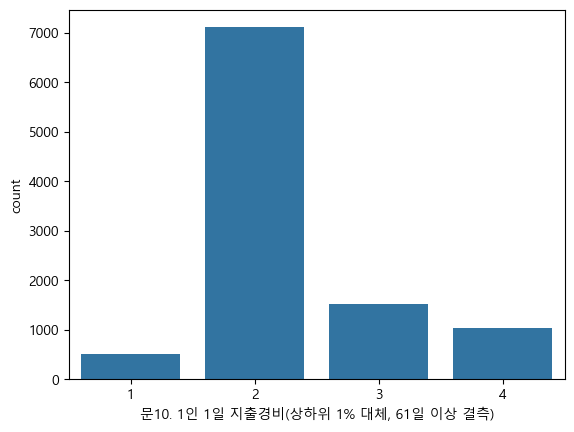

In [24]:
sns.countplot(data=df, x='문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)'
              , order=sorted(df['문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)'].unique()))
plt.show()

In [27]:
raw = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_만족도조사.csv', encoding='cp949')
raw.head()


,Unnamed: 0,아이디,한국 방문횟수(평균),한국 방문횟수(카테고리),한국 방문횟수(재방문),여행 형태,문1. 주요 방한 목적,문1-1. 한국여행 관심 계기_1순위,문1-1. 한국여행 관심 계기_2순위,문1-1. 한국여행 관심 계기_3순위,...,성별,연령별,방한목적별,방한횟수별,여행형태별,weight1,weight2,weight3,weight4,가중치
0,0,57,5,4,5.0,1,1,7.0,NaN,NaN,...,2,5,1,4,1,198.017146,NaN,NaN,NaN,198.017146
1,1,58,4,4,5.0,1,1,7.0,10.0,2.0,...,2,4,1,4,1,784.278401,NaN,NaN,NaN,784.278401
2,2,59,3,3,5.0,1,1,7.0,2.0,8.0,...,2,3,1,3,1,607.021269,NaN,NaN,NaN,607.021269
3,3,60,1,1,NaN,1,1,8.0,7.0,3.0,...,1,2,1,1,1,1049.500143,NaN,NaN,NaN,1049.500143
4,4,61,5,4,5.0,1,1,2.0,9.0,10.0,...,2,2,1,4,1,876.796936,NaN,NaN,NaN,876.796936


In [28]:
cols = ['아이디', '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)']
select_raw = raw[cols]
alldf = pd.merge(left=df, right=select_raw, on='아이디', how='inner')
alldf.head()

,아이디,국가별,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)_x",문9-3. 총 체재기간_61일 이상 결측,...,총_뷰티/의료_지출경비,총_국내_지출경비,여행_가이드_비율,숙박_비율,교통_비율,체험_문화_비율,쇼핑_비율,기타_비율,뷰티/의료_비율,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)_y"
0,57,13,2,5,4,6,1.0,3,3,3.0,...,0.0,2310.000000,0.004,0.433,0.065,0.022,0.216,0.000,0.0,451.666667
1,58,3,2,4,4,6,9.0,6,2,2.0,...,0.0,846.372229,0.000,0.239,0.029,0.005,0.574,0.010,0.0,272.935000
2,59,3,2,3,3,6,10.0,2,2,3.0,...,0.0,742.948932,0.000,0.217,0.054,0.043,0.435,0.011,0.0,177.650000
3,60,1,1,2,1,7,9.0,2,2,3.0,...,0.0,727.256097,0.002,0.384,0.134,0.000,0.192,0.000,0.0,153.780000
4,61,3,2,2,4,2,1.0,4,2,2.0,...,0.0,1259.775985,0.000,0.128,0.051,0.000,0.769,0.013,0.0,329.460000


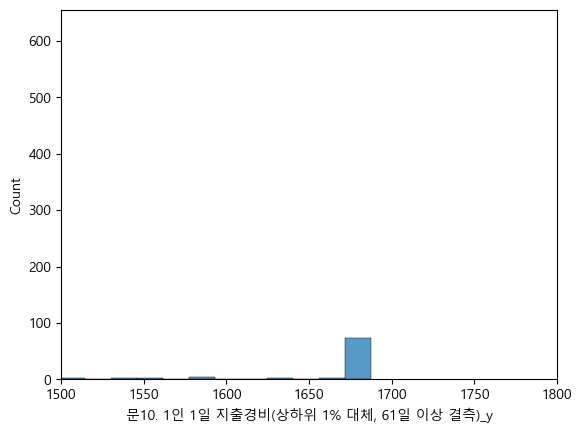

In [66]:
sns.histplot(data=alldf, x='문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)_y')
plt.xlim(1500,1800)
plt.show()

In [31]:
cost_outlier = alldf[alldf['문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)_y']>1600]
cost_outlier.shape

(80, 40)

80명이나 있음

In [32]:
alldf.columns

Index(['아이디', '국가별', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)_x', '문9-3. 총 체재기간_61일 이상 결측',
       '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역', '총 국내 지출경비', '식비_비율',
       '국내 교통비_비율', '체험/활동비_비율', '뷰티/의료비_비율', '여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율',
       '기타 비용_비율', '총_식비_지출경비', '총_여행_가이드_지출경비', '총_숙박_지출경비', '총_교통_지출경비',
       '총_체험_문화_지출경비', '총_쇼핑_지출경비', '총_기타_지출경비', '총_뷰티/의료_지출경비', '총_국내_지출경비',
       '여행_가이드_비율', '숙박_비율', '교통_비율', '체험_문화_비율', '쇼핑_비율', '기타_비율', '뷰티/의료_비율',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)_y'],
      dtype='object')

In [55]:
cols = ['국가별', '문9-3. 총 체재기간_61일 이상 결측', '여행동반자_그룹', '총_식비_지출경비', '총_여행_가이드_지출경비', '총_숙박_지출경비', '총_교통_지출경비',
       '총_체험_문화_지출경비', '총_쇼핑_지출경비', '총_기타_지출경비', '총_뷰티/의료_지출경비']

<Axes: xlabel='여행동반자_그룹', ylabel='count'>

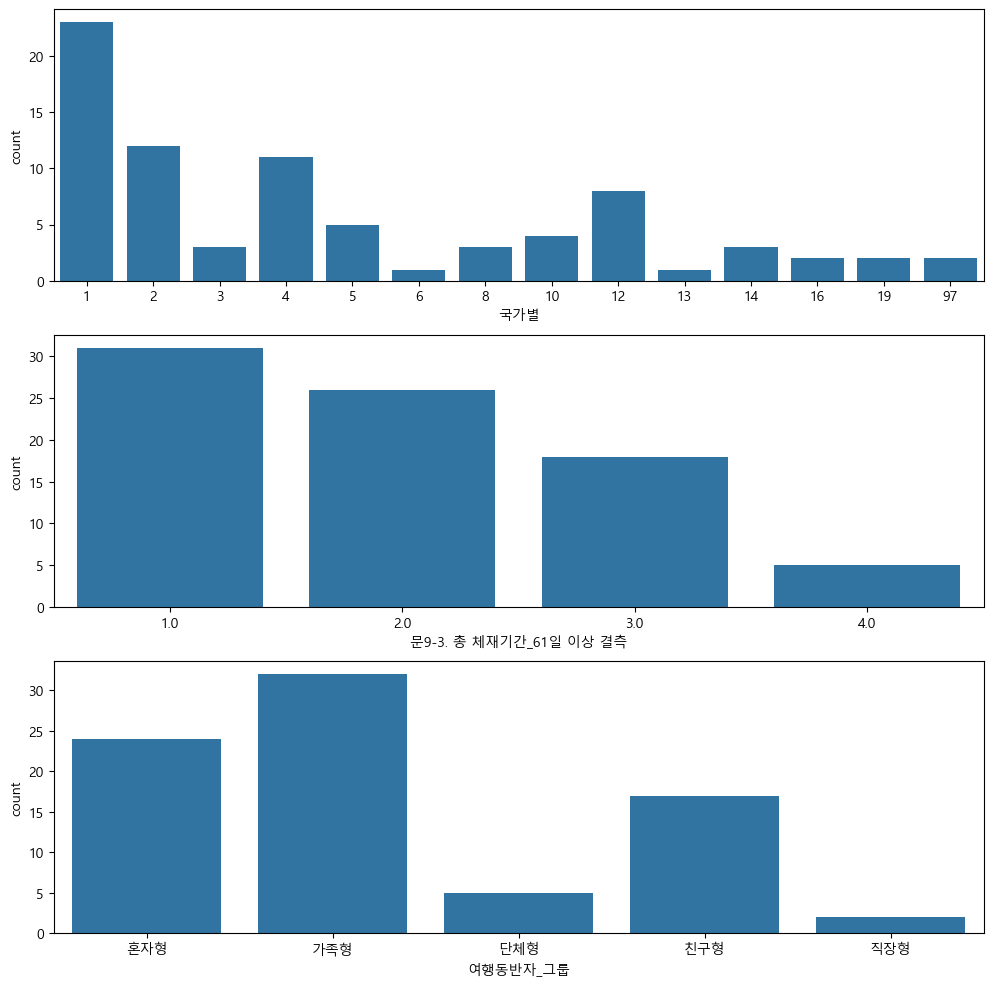

In [47]:
fig, ax = plt.subplots(3,1, figsize=(12,12))
sns.countplot(data=cost_outlier, x='국가별',ax=ax[0])
sns.countplot(data=cost_outlier, x='문9-3. 총 체재기간_61일 이상 결측', ax=ax[1])
sns.countplot(data=cost_outlier, x='여행동반자_그룹', ax=ax[2])

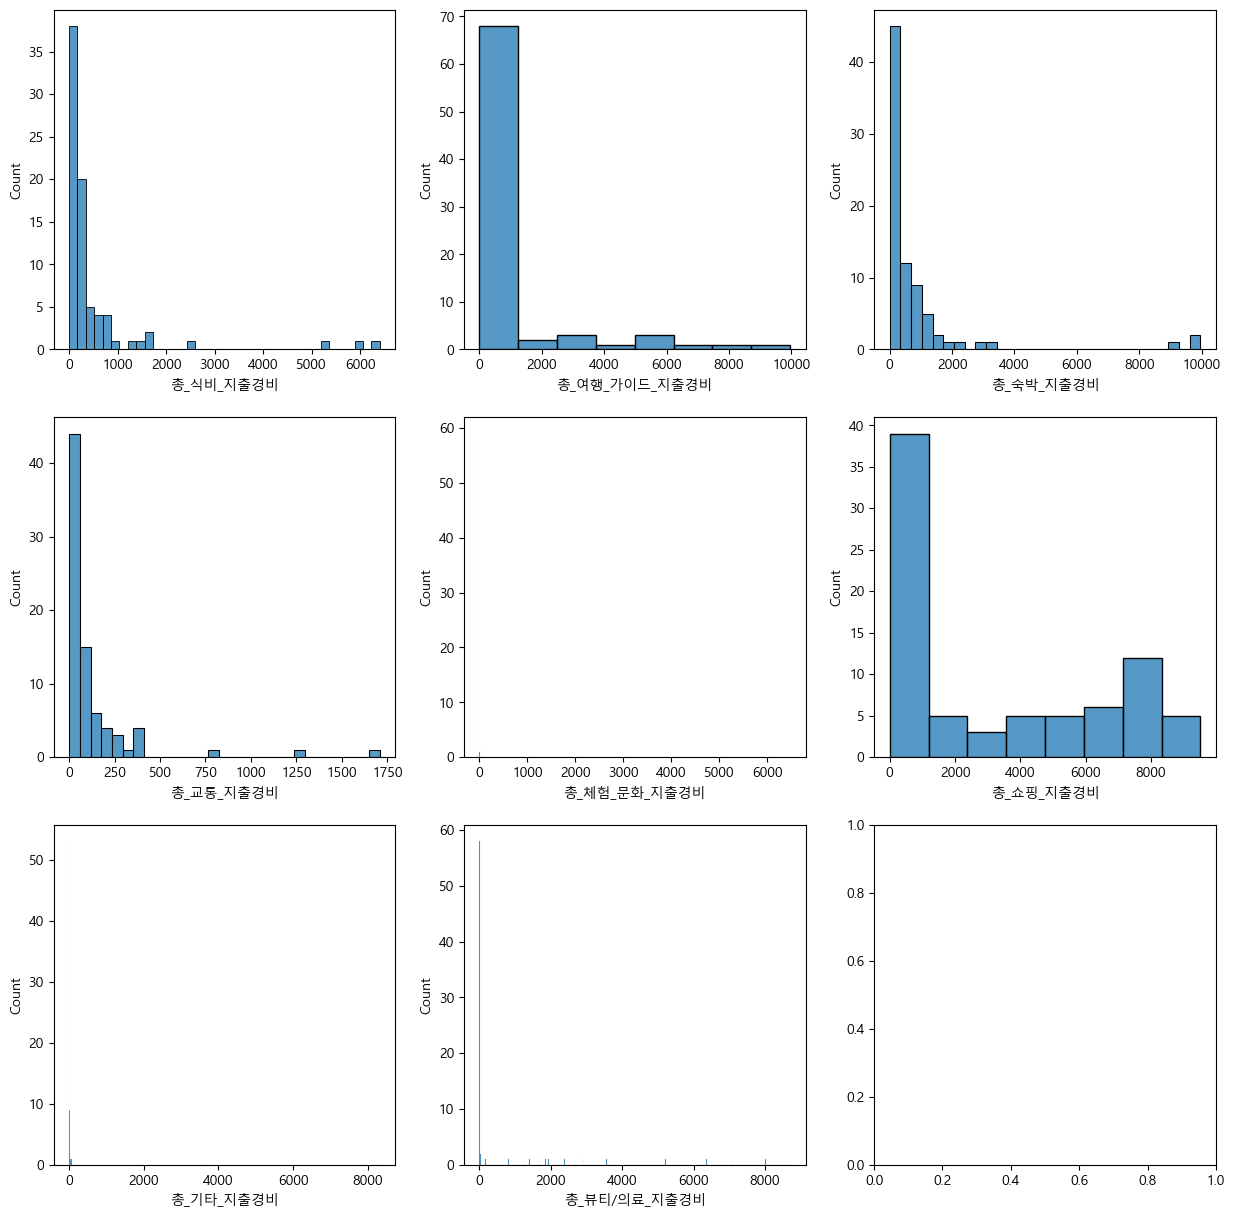

In [58]:
fig, ax = plt.subplots(3,3, figsize=(15,15))
ax= ax.flatten()
for i in range(8):
    sns.histplot(data=cost_outlier, x=cols[i+3], ax=ax[i])

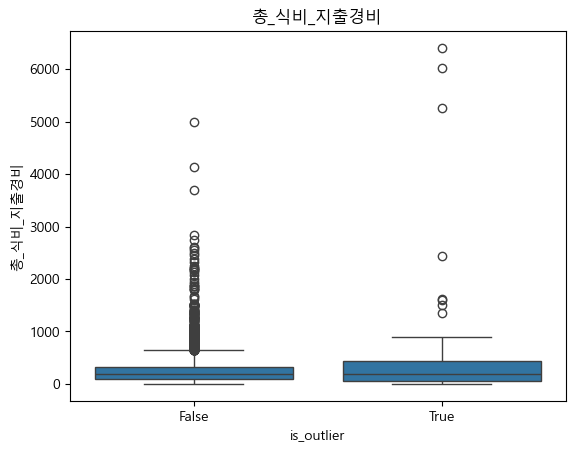

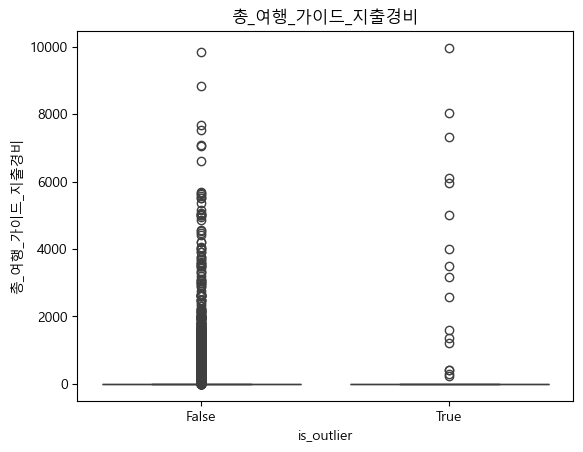

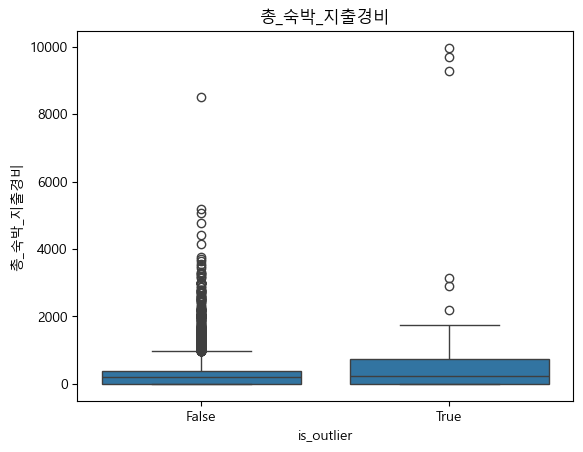

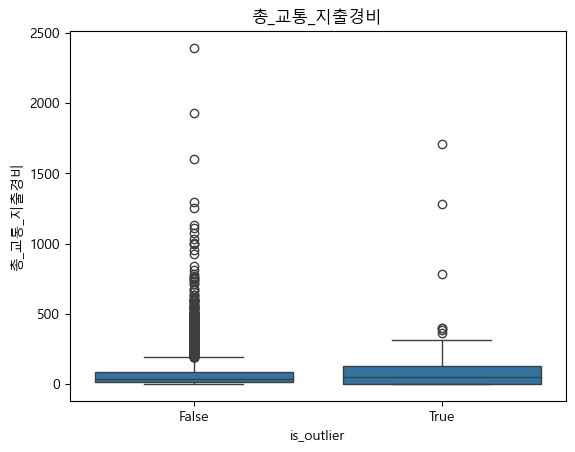

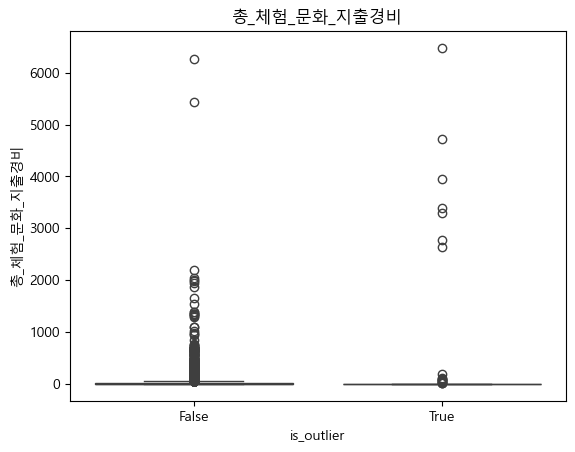

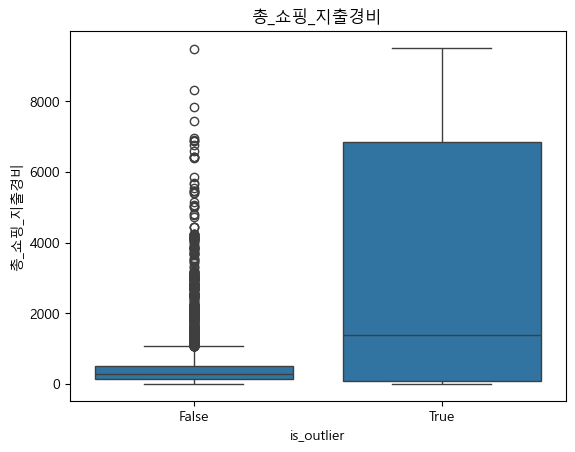

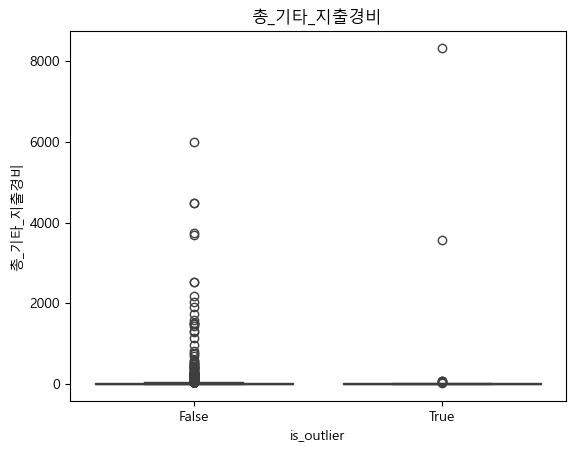

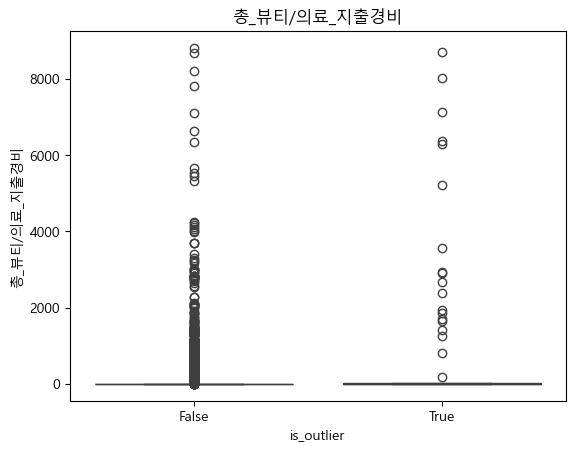

In [62]:
cols = ['총_식비_지출경비', '총_여행_가이드_지출경비', 
        '총_숙박_지출경비', '총_교통_지출경비',
        '총_체험_문화_지출경비', '총_쇼핑_지출경비',
        '총_기타_지출경비', '총_뷰티/의료_지출경비']

alldf['is_outlier'] = alldf['문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)_y'].isin(cost_outlier['문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)_y'])

for c in cols:
    sns.boxplot(data=alldf, x='is_outlier', y=c)
    plt.title(c)
    plt.show()

쇼핑 지출이 많아서 outlier가 된 듯

# '주요 체재 지역'

네, 85%가 '서울 집중형'이라는 결과에 당황스러우실 수 있습니다. 데이터 분석가로서 **"변별력이 없는 변수(Variance가 낮은 변수)는 나쁜 변수"**라는 직관을 가지는 것은 매우 훌륭한 자세입니다.

하지만 결론부터 말씀드리면, 그럼에도 불구하고 '여행 패턴' 변수는 사용하는 것이 좋습니다. 단, '보완'이 필요합니다.

85%의 쏠림이 있음에도 이 변수가 의미 있는 이유와, 이 85%의 거대 그룹을 어떻게 쪼개야 할지에 대한 솔루션을 제시해 드립니다.

1. 왜 85% 쏠림에도 사용해야 할까요?
이유 1: 15%의 "희소한 보석"을 찾아내는 필터 💎
비즈니스나 정책 관점에서 **15%의 '비서울/전국 여행객'**은 매우 중요한 타겟입니다. 이들은 체류 기간이 길고, 지방 경제에 기여하며, 재방문 가능성이 높은 고가치(High-value) 세그먼트일 가능성이 큽니다. 이 변수를 제거하면, 이 15%의 "진짜 여행가"들이 85%의 일반 관광객 속에 묻혀버리게 됩니다. 소수를 구별해내는 것 자체가 이 변수의 핵심 기능입니다.

이유 2: "서울만 간다"는 것도 강력한 행동 패턴입니다 🏙️
'서울 집중형'이라는 것은 단순히 위치 정보가 아니라, **"복잡한 이동을 싫어함", "효율성 추구", "도시 인프라 선호"**라는 성향을 내포합니다. 이 거대한 그룹을 하나의 덩어리로 정의해 주는 것만으로도 모델에게는 유용한 정보가 됩니다.

🏆 추천 전략: 솔루션 A (상세 버전) + 솔루션 B (비율)
'주요 체재 지역' 원본 변수는 과감하게 제거하고, 대신 아래 두 변수를 모델에 넣어주세요.

1. (메인 변수) 솔루션 A의 '상세' 버전: 상세 여행 패턴
이전에 논의했던 여행 패턴에 체류 기간을 결합하여 85%의 거대한 덩어리를 쪼개는 버전입니다.

변수 형태: 범주형 (Category)

구성:

서울 단기형: (서울 집중형 & 4일 이하) -> "가성비/쇼핑 찍고 턴"

서울 심층형: (서울 집중형 & 5일 이상) -> "K-Culture/비즈니스/체험"

수도권/지방형: (나머지 15%) -> "탐험가형"

선택 이유: 85%의 쏠림을 40% vs 45%로 나누어 데이터의 분산(Variance)을 확보해줍니다. 클러스터링 모델이 가장 좋아하는 형태입니다.

2. (보조 변수) 솔루션 B: 서울 체재 비율
사용자님이 발견한 "충남에 잤지만 서울에서 놀았다"는 현상을 모델에게 숫자로 설명해주는 변수입니다.

변수 형태: 수치형 (Numeric, 0.0 ~ 1.0)

선택 이유: 범주형 변수(A, C)가 설명하지 못하는 **미세한 '서울 의존도'**를 측정합니다.

서울 체재 비율 0.3인 사람 (지방 거점이지만 서울도 들름) vs 0.0인 사람 (완전 지방 여행)을 구분하는 데 결정적입니다.

국가별 변수 어케 묶지?